# Question 1

In [12]:
import pandas as pd

su = pd.read_csv("D:\\360DigiTMG\\DataScience\\25. Multiple Linear Regression\\Assignment Q\\50_Startups.csv")
su.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
su.drop(["State"], axis=1, inplace=True)
su.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

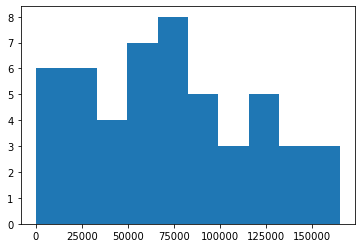

In [13]:
import matplotlib.pyplot as plt

plt.hist(su['R&D Spend'])

(array([ 2.,  1.,  3.,  7.,  7., 12.,  4., 11.,  2.,  1.]),
 array([ 51283.14 ,  64419.382,  77555.624,  90691.866, 103828.108,
        116964.35 , 130100.592, 143236.834, 156373.076, 169509.318,
        182645.56 ]),
 <BarContainer object of 10 artists>)

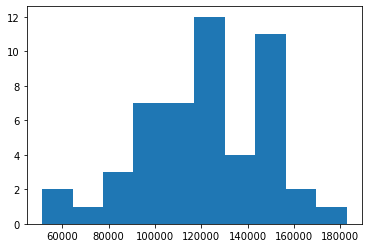

In [14]:
plt.hist(su['Administration'])

(array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <BarContainer object of 10 artists>)

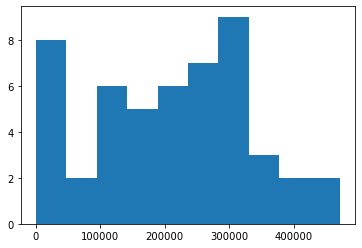

In [15]:
plt.hist(su['Marketing Spend'])

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <BarContainer object of 10 artists>)

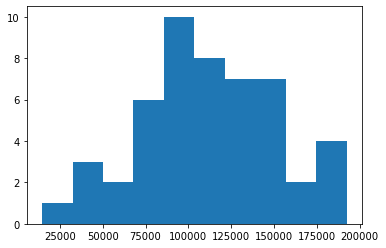

In [19]:
plt.hist(su['Profit'])

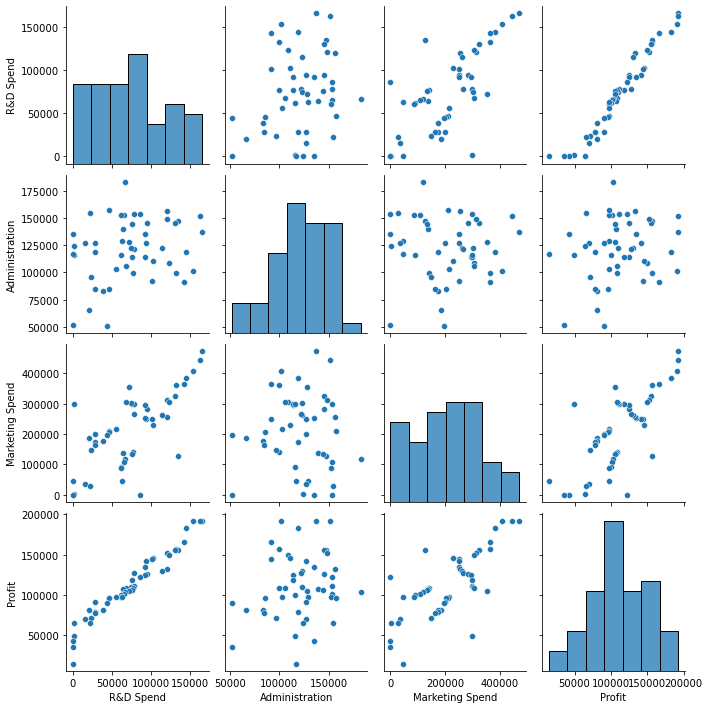

In [20]:
import seaborn as sn

sn.pairplot(su)

In [23]:
su.columns = "RD", "AD", "MA", "PR"
su

,RD,AD,MA,PR
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [24]:
import statsmodels.formula.api as smf

model1 = smf.ols("PR ~ RD + AD + MA", data=su).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        16:51:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MA             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pred1 = model1.predict(su.iloc[:, 0:3])
pred1

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [26]:
import numpy as np

rmse1 = np.sqrt(np.mean((su.PR - pred1) * (su.PR - pred1)))
rmse1

8855.34448901514

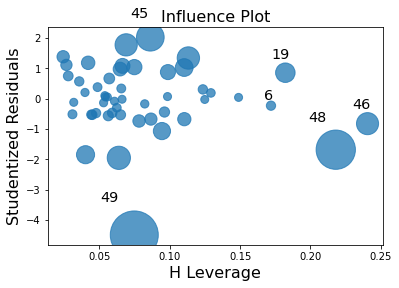

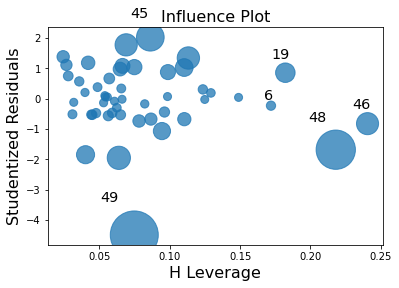

In [28]:
import statsmodels.api as smg

smg.graphics.influence_plot(model1)

In [30]:
su_new = su.drop(su.index[[49, 48]])

In [32]:
model2 = smf.ols("PR ~ RD + AD + MA", data=su_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.03e-31
Time:                        18:24:46   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
AD            -0.0633      0.044     -1.442      0.156      -0.152       0.025
MA             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
pred2 = model2.predict()
pred2

array([188939.27748431, 185378.57912707, 180724.3541904 , 172036.17697337,
       171688.34131242, 163022.0004802 , 158209.61412234, 158220.90798356,
       150109.69929046, 154738.69309127, 136423.99660774, 136983.07754119,
       129358.85601629, 127411.30396874, 148209.73335416, 146169.35203984,
       117452.47339394, 129413.39883355, 129283.71504442, 117601.47193557,
       117133.0612167 , 116309.22709875, 114863.21169632, 110864.90055894,
       116009.98846338, 103641.27806068, 111704.1628601 , 113893.99203167,
       101671.53647611, 103009.36638408, 102256.7293717 ,  99182.29441439,
       101752.15766831, 100008.33434856,  89323.2954028 ,  93510.86009134,
        77077.51666719,  93971.55343735,  74021.94644148,  87240.00592956,
        77209.48129459,  78532.18433479,  74169.8330406 ,  63870.99686887,
        67279.61092272,  52055.36655632,  57819.90138959,  50519.33418229])

In [34]:
rmse2 = np.sqrt(np.mean((su_new.PR - pred2) * (su_new.PR - pred2)))
rmse2

7036.4848100048

In [37]:
rs_rd = smf.ols("RD ~ AD + MA", data = su).fit().rsquared
vif_rd = 1/(1 - rs_rd)
vif_rd

2.4689030699947017

In [38]:
rs_ad = smf.ols("AD ~ RD + MA", data=su).fit().rsquared
vif_ad = 1/(1 - rs_ad)
vif_ad

1.1750910070550458

In [39]:
rs_ma = smf.ols("MA ~ AD + RD", data=su).fit().rsquared
vif_ma = 1/(1 - rs_ma)
vif_ma

2.3267732905308773

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


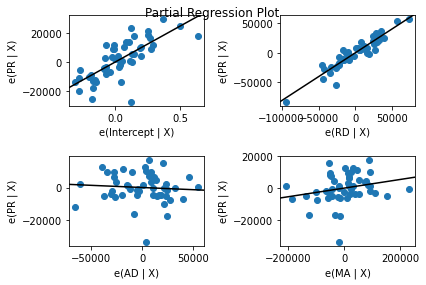

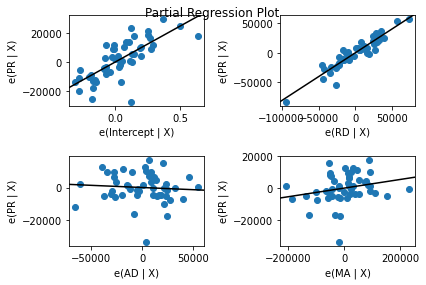

In [41]:
smg.graphics.plot_partregress_grid(model1)

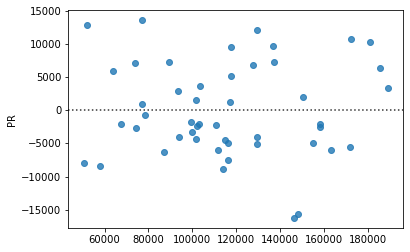

In [44]:
import seaborn as sn

sn.residplot(x=pred2, y = su_new.PR)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(su_new, test_size=0.2)
final_model = smf.ols("PR ~ RD + AD + MA", data=train).fit()
train_predict = final_model.predict(train.iloc[:, 0:3])
train_rmse = np.sqrt(np.mean((train.PR - train_predict) * (train.PR - train_predict)))
train_rmse

7292.030133021959

In [45]:
test_predict = final_model.predict(test.iloc[:, 0:3])
test_rmse = np.sqrt(np.mean((test.PR - test_predict) * (test.PR - test_predict)))
test_rmse

6300.206844722976

# Question 3

In [72]:
import pandas as pd

tc = pd.read_csv("D:\\360DigiTMG\\DataScience\\25. Multiple Linear Regression\\Assignment Q\\ToyotaCorolla.csv", encoding= 'unicode_escape')
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [73]:
tc.drop(['Model', 'Id'], axis=1, inplace=True)
tc.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [74]:
tc.dtypes

Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
tc.Fuel_Type = lbl.fit_transform(tc.Fuel_Type)
tc.Color = lbl.fit_transform(tc.Color)
tc.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,1,90,1,2,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,1,90,1,6,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,1,90,1,2,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,1,90,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,1,90,0,1,0,...,1,1,1,0,1,0,1,0,0,0


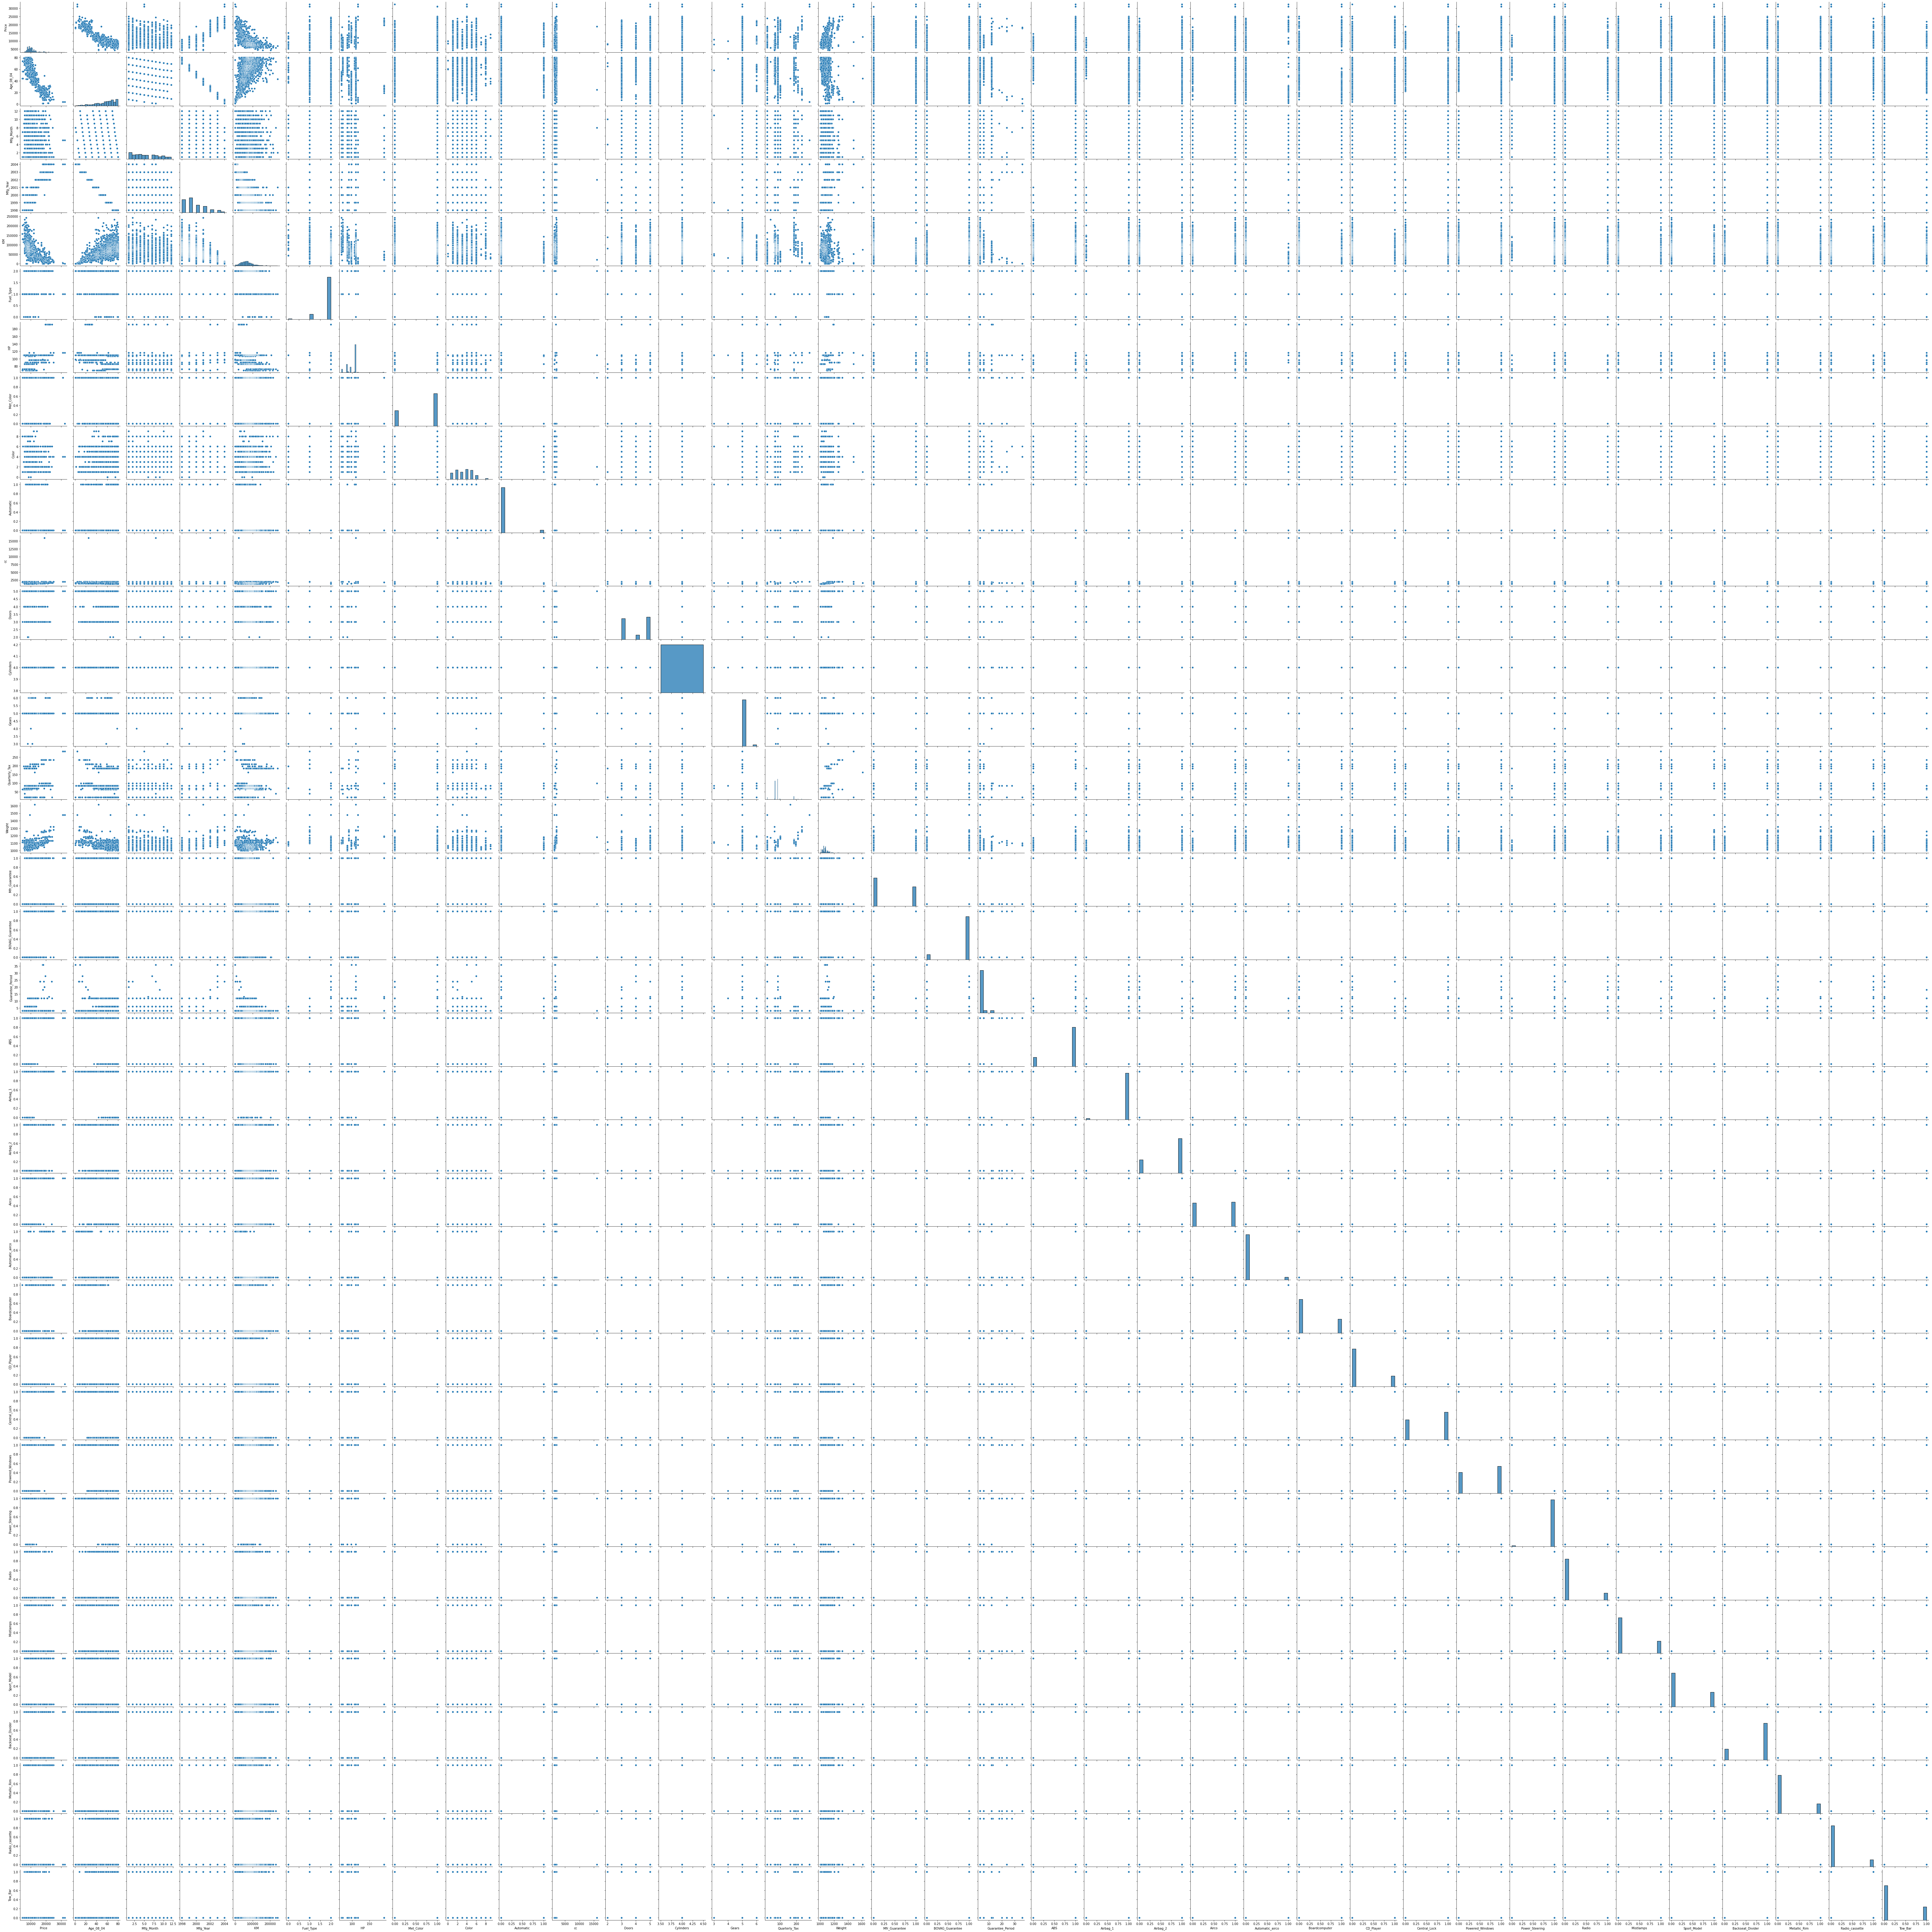

In [76]:
import seaborn as sns
sns.pairplot(tc)

In [77]:
tc.var()==0

Price               False
Age_08_04           False
Mfg_Month           False
Mfg_Year            False
KM                  False
Fuel_Type           False
HP                  False
Met_Color           False
Color               False
Automatic           False
cc                  False
Doors               False
Cylinders            True
Gears               False
Quarterly_Tax       False
Weight              False
Mfr_Guarantee       False
BOVAG_Guarantee     False
Guarantee_Period    False
ABS                 False
Airbag_1            False
Airbag_2            False
Airco               False
Automatic_airco     False
Boardcomputer       False
CD_Player           False
Central_Lock        False
Powered_Windows     False
Power_Steering      False
Radio               False
Mistlamps           False
Sport_Model         False
Backseat_Divider    False
Metallic_Rim        False
Radio_cassette      False
Tow_Bar             False
dtype: bool

In [78]:
tc.drop(['Cylinders'], axis=1, inplace=True)

In [79]:
tc.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,-0.022157,0.314990,0.108905,-0.051590,0.033081,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,0.080261,-0.156622,-0.108150,0.029712,0.031717,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.043774,-0.039312,0.030266,-0.035049,0.009146,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,-0.072803,0.164697,0.103310,-0.023532,-0.033567,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.420586,-0.333538,-0.080503,0.038198,-0.081854,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
Fuel_Type,-0.022157,0.080261,-0.043774,-0.072803,-0.420586,1.000000,0.409476,-0.001859,-0.058285,0.069718,...,0.040401,0.080161,-0.028092,-0.007220,0.079659,0.043877,0.060458,0.040399,-0.007934,0.027266
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,0.409476,1.000000,0.058712,-0.018910,0.013144,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,-0.001859,0.058712,1.000000,-0.167835,-0.019335,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Color,-0.051590,0.029712,-0.035049,-0.023532,0.038198,-0.058285,-0.018910,-0.167835,1.000000,0.010509,...,-0.075589,-0.076544,-0.020958,0.063828,-0.134614,-0.084437,-0.124984,-0.095493,0.068035,0.023717
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.069718,0.013144,-0.019335,0.010509,1.000000,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786


In [80]:
y = tc['Price']
tc.drop(['Price'], axis=1, inplace=True)

In [93]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms_tc = pd.DataFrame(mms.fit_transform(tc), columns=tc.columns)
mms_tc.describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,0.695533,0.413522,0.270891,0.282027,0.934192,0.264245,0.674791,0.390436,0.055710,0.018834,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,0.235443,0.304917,0.256787,0.154348,0.185786,0.121797,0.468616,0.189016,0.229441,0.028870,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.544304,0.181818,0.000000,0.176951,1.000000,0.170732,0.000000,0.222222,0.000000,0.006803,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.759494,0.363636,0.166667,0.260859,1.000000,0.333333,1.000000,0.444444,0.000000,0.020408,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.873418,0.636364,0.500000,0.358107,1.000000,0.333333,1.000000,0.555556,0.000000,0.020408,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(tc.columns))
pca_values = pca.fit(mms_tc)
pca_values

PCA(n_components=34)

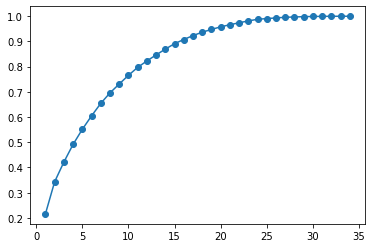

In [95]:
plt.plot(range(1,35), pca_values.explained_variance_ratio_.cumsum(), marker="o", linestyle='-')

In [98]:
pca_components = pd.DataFrame(pca.fit_transform(mms_tc))
pca_components

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.469442,-0.214297,0.257501,-0.460883,0.167708,-0.293829,0.218099,0.027941,-0.651677,-0.870405,...,-0.102942,-0.111360,-0.006381,-0.016236,-0.061340,0.013064,-0.010688,0.005518,0.005165,3.581091e-14
1,0.665586,-0.497769,0.647950,-0.824821,0.240033,-0.455331,-0.008247,-0.338626,-0.093333,-0.218246,...,-0.048757,-0.090709,0.014138,-0.014998,-0.087880,0.012515,-0.009732,-0.007077,-0.000482,1.777322e-14
2,-0.196649,-1.173800,0.699145,-0.177559,-0.239929,0.290741,-0.036218,-0.317893,-0.254155,-0.237599,...,-0.114894,-0.119692,0.002673,-0.016800,-0.068584,0.017388,-0.000764,0.000283,0.007562,1.305276e-14
3,-0.313086,-1.217895,0.269601,-0.554189,-0.053949,0.730696,-0.358308,0.136896,0.021148,-0.235753,...,-0.112530,-0.116730,0.003934,-0.014289,-0.062037,0.015919,-0.000676,-0.001315,0.008484,1.230349e-14
4,1.181925,-0.159571,-0.170805,-0.435362,-0.067884,0.844698,-0.496236,0.344511,-0.114937,-0.131775,...,-0.108479,-0.155938,-0.080665,-0.011063,-0.042676,0.034602,-0.001180,-0.010264,0.011245,9.810444e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.893554,-0.089064,-0.601702,0.695408,-0.207308,0.184223,0.486614,0.054887,-0.504189,0.483175,...,-0.030491,-0.079449,-0.249029,0.021159,0.023834,0.018635,0.005671,-0.012900,-0.003179,-1.857631e-14
1432,-0.881035,-0.946610,-0.863926,-0.180663,0.448436,-0.036618,0.259796,0.169374,-0.031124,0.042488,...,-0.043884,-0.109075,-0.225778,0.035456,0.021911,-0.008492,0.000324,-0.002443,-0.001725,-1.521184e-14
1433,-1.152107,-0.426857,-0.598732,-0.359693,-0.087630,0.167781,-0.188982,-0.018905,-0.019722,-0.466350,...,-0.053328,-0.031409,-0.201526,0.044838,0.034004,-0.033150,0.018460,-0.001691,-0.006567,-9.368140e-15
1434,-1.222076,-0.126774,0.198311,0.165295,-1.107361,0.417550,0.369728,-0.189390,0.065570,-0.053357,...,0.137304,-0.115760,-0.154615,0.013900,0.045675,-0.030400,-0.004075,0.031160,0.004830,-7.298133e-15


In [99]:
required_pca_components = pca_components.iloc[:, :9]
required_pca_components

,0,1,2,3,4,5,6,7,8
0,0.469442,-0.214297,0.257501,-0.460883,0.167708,-0.293829,0.218099,0.027941,-0.651677
1,0.665586,-0.497769,0.647950,-0.824821,0.240033,-0.455331,-0.008247,-0.338626,-0.093333
2,-0.196649,-1.173800,0.699145,-0.177559,-0.239929,0.290741,-0.036218,-0.317893,-0.254155
3,-0.313086,-1.217895,0.269601,-0.554189,-0.053949,0.730696,-0.358308,0.136896,0.021148
4,1.181925,-0.159571,-0.170805,-0.435362,-0.067884,0.844698,-0.496236,0.344511,-0.114937
...,...,...,...,...,...,...,...,...,...
1431,0.893554,-0.089064,-0.601702,0.695408,-0.207308,0.184223,0.486614,0.054887,-0.504189
1432,-0.881035,-0.946610,-0.863926,-0.180663,0.448436,-0.036618,0.259796,0.169374,-0.031124
1433,-1.152107,-0.426857,-0.598732,-0.359693,-0.087630,0.167781,-0.188982,-0.018905,-0.019722
1434,-1.222076,-0.126774,0.198311,0.165295,-1.107361,0.417550,0.369728,-0.189390,0.065570


In [100]:
required_pca_components.columns = 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'
required_pca_components

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.469442,-0.214297,0.257501,-0.460883,0.167708,-0.293829,0.218099,0.027941,-0.651677
1,0.665586,-0.497769,0.647950,-0.824821,0.240033,-0.455331,-0.008247,-0.338626,-0.093333
2,-0.196649,-1.173800,0.699145,-0.177559,-0.239929,0.290741,-0.036218,-0.317893,-0.254155
3,-0.313086,-1.217895,0.269601,-0.554189,-0.053949,0.730696,-0.358308,0.136896,0.021148
4,1.181925,-0.159571,-0.170805,-0.435362,-0.067884,0.844698,-0.496236,0.344511,-0.114937
...,...,...,...,...,...,...,...,...,...
1431,0.893554,-0.089064,-0.601702,0.695408,-0.207308,0.184223,0.486614,0.054887,-0.504189
1432,-0.881035,-0.946610,-0.863926,-0.180663,0.448436,-0.036618,0.259796,0.169374,-0.031124
1433,-1.152107,-0.426857,-0.598732,-0.359693,-0.087630,0.167781,-0.188982,-0.018905,-0.019722
1434,-1.222076,-0.126774,0.198311,0.165295,-1.107361,0.417550,0.369728,-0.189390,0.065570


In [105]:
final_dataset = pd.concat([required_pca_components, y], axis=1)
final_dataset

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,Price
0,0.469442,-0.214297,0.257501,-0.460883,0.167708,-0.293829,0.218099,0.027941,-0.651677,13500
1,0.665586,-0.497769,0.647950,-0.824821,0.240033,-0.455331,-0.008247,-0.338626,-0.093333,13750
2,-0.196649,-1.173800,0.699145,-0.177559,-0.239929,0.290741,-0.036218,-0.317893,-0.254155,13950
3,-0.313086,-1.217895,0.269601,-0.554189,-0.053949,0.730696,-0.358308,0.136896,0.021148,14950
4,1.181925,-0.159571,-0.170805,-0.435362,-0.067884,0.844698,-0.496236,0.344511,-0.114937,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.893554,-0.089064,-0.601702,0.695408,-0.207308,0.184223,0.486614,0.054887,-0.504189,7500
1432,-0.881035,-0.946610,-0.863926,-0.180663,0.448436,-0.036618,0.259796,0.169374,-0.031124,10845
1433,-1.152107,-0.426857,-0.598732,-0.359693,-0.087630,0.167781,-0.188982,-0.018905,-0.019722,8500
1434,-1.222076,-0.126774,0.198311,0.165295,-1.107361,0.417550,0.369728,-0.189390,0.065570,7250


In [106]:
import statsmodels.formula.api as smf

ml1 = smf.ols("Price ~ pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9", data=final_dataset).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     332.3
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:05:49   Log-Likelihood:                -12995.
No. Observations:                1436   AIC:                         2.601e+04
Df Residuals:                    1426   BIC:                         2.606e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     54.555    196.699      0.000    1.06e+04    1.08e+04
pc1         2513.0443     59.946     41.922      0.000    2395.453    2630.636
pc2         -598.6829     77.948     -7.681      0.000    -751.588    -445.777
pc3         2080.3924     99.622     20.883      0.000    1884.971    2275.814
pc4        -2071.3647    105.013    -19.725      0.000   -2277.361   -1865.368
pc5          624.9054    113.930      5.485      0.000     401.418     848.393
pc6          507.9634    120.504      4.215      0.000     271.579     744.347
pc7         1324.7452    125.100     10.589      0.000    1079.345    1570.145
pc8          530.9959    136.139      3.900      0.000     263.941     798.051
pc9         1963.9529    148.833     13.196      0.000    1671.998    2255.908
==============================================================================
Omnibus:                      374.547   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2271.670
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       8.778   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_dataset, test_size=0.2)

In [108]:
ml_final = smf.ols("Price ~ pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9", data=train).fit()
train_predict = ml_final.predict(train.iloc[:, 0:9])
train_predict

1095     8097.917315
852      8241.963840
480     10873.425491
408     12624.750667
283     12131.003062
            ...     
881      7488.109376
350      9078.793135
847      9060.504257
22      16773.736517
388     12212.418961
Length: 1148, dtype: float64

In [109]:
train_rmse = np.sqrt(np.mean((train_predict - train.Price) * (train_predict - train.Price)))
train_rmse

2020.829072445618

In [110]:
test_predict = ml_final.predict(test.iloc[:, 0:9])
test_predict

548     11447.972376
809      8329.634302
700      9080.572127
544     12402.319692
815      7921.791407
            ...     
1111     8285.518846
583     12174.500426
1328     7665.874209
1415     7966.336952
118     16990.133019
Length: 288, dtype: float64

In [111]:
test_rmse = np.sqrt(np.mean((test_predict - test.Price) * (test_predict - test.Price)))
test_rmse

2220.586679017883

# Question 4

In [115]:
import pandas as pd

avacado = pd.read_csv("D:\\360DigiTMG\\DataScience\\25. Multiple Linear Regression\\Assignment Q\\Avacado_Price.csv")
avacado.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [117]:
avacado.var()==0

C:\Users\riten\AppData\Local\Temp\ipykernel_17768\629629774.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avacado.var()==0


AveragePrice    False
Total_Volume    False
tot_ava1        False
tot_ava2        False
tot_ava3        False
Total_Bags      False
Small_Bags      False
Large_Bags      False
XLarge Bags     False
year            False
dtype: bool

In [118]:
y = avacado.AveragePrice
avacado.drop(['AveragePrice'], axis=1, inplace=True)
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [128]:
avacado_obj = avacado.select_dtypes("object")
avacado_obj

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [129]:
avacado_num = avacado.select_dtypes(["int", "float"])
avacado_num

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [132]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
avacado_num = pd.DataFrame(minmax.fit_transform(avacado_num), columns=avacado_num.columns)
avacado_num.describe()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.013608,0.012883,0.014418,0.008969,0.012370,0.013612,0.009501,0.005631,0.382633
std,0.055252,0.055620,0.058822,0.042202,0.050908,0.055749,0.042658,0.032070,0.313313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000172,0.000038,0.000147,0.000000,0.000263,0.000213,0.000022,0.000000,0.000000
50%,0.001717,0.000380,0.001420,0.000073,0.002051,0.001970,0.000463,0.000000,0.333333
75%,0.006925,0.004881,0.007338,0.002452,0.005718,0.006226,0.003852,0.000240,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
avacado_obj.type = lbl.fit_transform(avacado.type)
avacado_obj.region = lbl.fit_transform(avacado.region)
avacado_obj

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [143]:
final_dataset_for_pca = pd.concat([avacado_num, avacado_obj], axis=1)
final_dataset_for_pca.drop(["region"], axis=1, inplace=True)
final_dataset_for_pca

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,type
0,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0
1,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0
2,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0
3,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0
4,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,1
18245,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,1
18246,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,1
18247,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,1


In [144]:
from sklearn.decomposition import PCA

pca = PCA()
pca_values = pca.fit(final_dataset_for_pca)
pca_values.explained_variance_ratio_

array([6.81978435e-01, 2.66817252e-01, 4.62465652e-02, 2.10770503e-03,
       1.25700678e-03, 7.31404554e-04, 5.60397813e-04, 3.01233806e-04,
       1.31992642e-12, 1.89945565e-17])

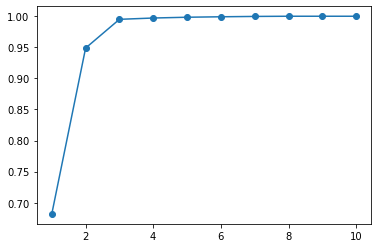

In [146]:
plt.plot(range(1,11), pca_values.explained_variance_ratio_.cumsum(), marker="o", linestyle="-")

In [149]:
pca_values = pd.DataFrame(pca.fit_transform(final_dataset_for_pca))
pca_values = pca_values.iloc[:, 0:2]
pca_values.columns = 'pc1', 'pc2'
pca_values

,pc1,pc2
0,0.496529,-0.383827
1,0.496513,-0.383826
2,0.496629,-0.383827
3,0.496552,-0.383832
4,0.496500,-0.383832
...,...,...
18244,-0.500768,0.617478
18245,-0.500782,0.617471
18246,-0.500778,0.617469
18247,-0.500771,0.617472


In [150]:
final_dataset = pd.concat([pca_values, y], axis=1)
final_dataset

,pc1,pc2,AveragePrice
0,0.496529,-0.383827,1.33
1,0.496513,-0.383826,1.35
2,0.496629,-0.383827,0.93
3,0.496552,-0.383832,1.08
4,0.496500,-0.383832,1.28
...,...,...,...
18244,-0.500768,0.617478,1.63
18245,-0.500782,0.617471,1.71
18246,-0.500778,0.617469,1.87
18247,-0.500771,0.617472,1.93


In [156]:
import statsmodels.formula.api as smf

ml1 = smf.ols('AveragePrice ~ pc1 + pc2', data=final_dataset).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     5806.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:44:20   Log-Likelihood:                -4800.4
No. Observations:               18249   AIC:                             9607.
Df Residuals:                   18246   BIC:                             9630.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4060      0.002    603.335      0.000       1.401       1.411
pc1           -0.4955      0.005   -106.538      0.000      -0.505      -0.486
pc2            0.1201      0.007     16.153      0.000       0.106       0.135
==============================================================================
Omnibus:                      755.193   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.474
Skew:                           0.375   Prob(JB):                    5.12e-259
Kurtosis:                       4.001   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_dataset, test_size=0.2)
final_model = smf.ols('AveragePrice ~ pc1 + pc2', data=train).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     4641.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:17:27   Log-Likelihood:                -3912.0
No. Observations:               14599   AIC:                             7830.
Df Residuals:                   14596   BIC:                             7853.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4086      0.003    537.957      0.000       1.403       1.414
pc1           -0.4977      0.005    -95.239      0.000      -0.508      -0.487
pc2            0.1213      0.008     14.487      0.000       0.105       0.138
==============================================================================
Omnibus:                      553.830   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.193
Skew:                           0.351   Prob(JB):                    2.98e-189
Kurtosis:                       3.966   Cond. No.                         3.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
train_predict = final_model.predict(train.iloc[:, 0:2]);
train_predict

15862    1.692398
4527     1.154052
1587     1.114439
17515    1.692185
13972    1.652055
           ...   
2211     1.114198
13238    1.651899
2379     1.109299
3252     1.154054
16873    1.692398
Length: 14599, dtype: float64

In [164]:
train_rmse = np.sqrt(np.mean((train.AveragePrice - train_predict) * ((train.AveragePrice - train_predict))))
train_rmse

0.3163290791157482

In [165]:
test_predict = final_model.predict(test.iloc[:, 0:2]);
test_predict

6489     1.195287
10789    1.611742
14555    1.652067
7214     1.195302
3707     1.154922
           ...   
17168    1.692157
3943     1.154893
10978    1.611710
2910     1.154717
6088     1.194281
Length: 3650, dtype: float64

In [166]:
test_rmse = np.sqrt(np.mean((test.AveragePrice - test_predict) * ((test.AveragePrice - test_predict))))
test_rmse

0.30855981404761545